**Homework 10 Exercise 4 Exploratory Exercise and Analysis**

Homework 10, Exercise 4 asks us to look at a baseline set of hyperparameters for a model plus 8 variations.  We are asked to run a model with each of those sets of parameters and consider the observed training and validation accuracy.  I added one more variation of interest.  So, in all, I consider ten variations with each set of parameters identified by a particular `panel_index` in this discussion.

As I started to work on the problem I realized that the results depend on the hardware being used to run the experiment.  Moreover, while the use of a `seed` function allows for reproducible results when a GPU is not used, reproducibility does not seem attainable when a GPU is used.  But even though disabling the GPU allows for reproducible results on each platform, the ordering of the resulting validation accuracy numbers is inconsistent between the two platforms.

To address these concerns I decided that I would run each of ten model configurations thirty times, once on an Intel CPU without the benefit of a GPU, once on an Apple M1 CPU without the benefit of a GPU, 14 times on an Intel CPU with GPU support and 14 times on an Apple M1 CPU with GPU support.  I did not alter the seed numbers used.  I could have done so in order to yield more variety on the non GPU configurations.

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

plt.style.use("seaborn-darkgrid")

**Dataset**

The results of the 300 trial runs are included in the accompanying CSV file.

Let's confirm that we have 150 trials on each platform and that in each case, 10 of the 150 are without GPU support and 140 are with GPU support.

In [2]:
df = pd.read_csv("homework_10_exercise_4_results.csv")
df.shape

(300, 17)

In [3]:
df.groupby(["processor", "gpu"]).size()

processor  gpu                                                     
arm        [LogicalDevice(name='/device:GPU:0', device_type='GPU')]    140
           []                                                           10
x86_64     [LogicalDevice(name='/device:GPU:0', device_type='GPU')]    140
           []                                                           10
dtype: int64

Display the first panel of ten which coincides with the M1 platform trial without GPU support.

In [4]:
df[0:10]

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
0,0,0.8579,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
1,1,0.9474,0.8065,0.7273,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
2,2,0.8895,0.8065,0.7879,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
3,3,0.8789,0.8065,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
4,4,0.8316,0.8065,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,[],1657420443
5,5,0.7211,0.5806,0.5152,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,10,1234,arm,[],1657420443
6,6,0.9000,0.8710,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,arm,[],1657420443
7,7,0.8684,0.8387,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,arm,[],1657420443
8,8,0.9211,0.8387,0.6970,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,arm,[],1657420443
9,9,0.9316,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,10,1234,arm,[],1657420443


**Comparing the non GPU trials.**

The next table shows repeats the table presented above, but the results are sorted from best to worst validation accuracy.  The next succeeding table shows the results for the Intel platform without GPU support, also sorted from best to worst validation accuracy.  Note that the order of the two tables is **not** the same.  The best performing configuration on one is not the same as the best performing configuration on the other.  However, in both cases, the hyperparameter set with the `SGD` optimizer is at the bottom of the list.

In [5]:
df[(df.processor == "arm") & (df.gpu == "[]")].sort_values(
    "validation_accuracy", ascending=False
)

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
6,6,0.9000,0.8710,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,arm,[],1657420443
0,0,0.8579,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
7,7,0.8684,0.8387,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,arm,[],1657420443
8,8,0.9211,0.8387,0.6970,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,arm,[],1657420443
1,1,0.9474,0.8065,0.7273,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
2,2,0.8895,0.8065,0.7879,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
3,3,0.8789,0.8065,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
4,4,0.8316,0.8065,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,[],1657420443
9,9,0.9316,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,10,1234,arm,[],1657420443
5,5,0.7211,0.5806,0.5152,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,10,1234,arm,[],1657420443


In [6]:
df[(df.processor != "arm") & (df.gpu == "[]")].sort_values(
    "validation_accuracy", ascending=False
)

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
10,0,0.9263,0.9032,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
13,3,0.8947,0.8387,0.7576,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
14,4,0.7526,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
11,1,0.9158,0.8065,0.8182,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
12,2,0.8737,0.8065,0.6667,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
17,7,0.8632,0.8065,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,x86_64,[],1657421344
18,8,0.8737,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,[],1657421344
19,9,0.8895,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,10,1234,x86_64,[],1657421344
16,6,0.9263,0.7742,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,x86_64,[],1657421344
15,5,0.6421,0.4839,0.2727,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,10,1234,x86_64,[],1657421344


**Distribution of Validation Accuracy Results**

Lets take a look at the distribution of validation accuracy results.  There is a clear concentration at around 80%.

Text(0.5, 0, 'validation accuracy')

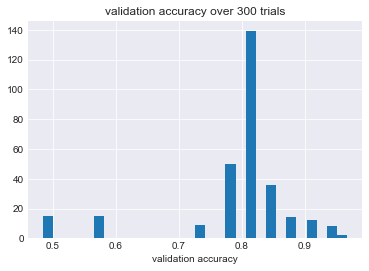

In [7]:
df.validation_accuracy.hist(bins=30)
plt.title("validation accuracy over 300 trials")
plt.xlabel("validation accuracy")

Lets take a look at the top 30 validation accuracy percentages from the 300 trial runs (the top 10%), sorted in descending order of validation accuracy.  The distribution by parameter set is not uniform.  Set 3 appears most frequently, followed by set 8.  I should note that while working on this analysis I observed that even this result is not consistent, i.e., with a different set of 300 similar trials, I observed other hyperparameter sets appearing most frequently in the top 30 validation score table.

In [8]:
df.sort_values("validation_accuracy", ascending=False)[0:30]

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
218,8,0.9158,0.9677,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450067
233,3,0.8684,0.9677,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450155
173,3,0.8842,0.9355,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657449874
198,8,0.9105,0.9355,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657449982
263,3,0.8947,0.9355,0.8182,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450561
188,8,0.9053,0.9355,0.8788,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657449928
220,0,0.9263,0.9355,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450114
228,8,0.9421,0.9355,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450114
238,8,0.9053,0.9355,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450155
208,8,0.9263,0.9355,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,x86_64,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657450019


The following histrogram makes it easier to understand the preceding table.  Hyperparameter set 3 appears the most often, followed by set 9.  Sets 1 and 5 do not appear at all.

Text(0.5, 1.0, 'top 30 validation accuracy count')

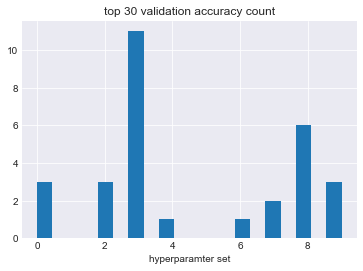

In [9]:
df.sort_values("validation_accuracy", ascending=False)[0:30]["panel_index"].hist(
    bins=20
)
plt.xlabel("hyperparamter set")
plt.title("top 30 validation accuracy count")

**Distribution of Validation Accuracy Scores for Each Hyperparameter Set**

The following series of histograms shows the distribution of validation accuracy scores for the thirty trials of each parameter set.  Parameter set 5 is very interesting, in part because the results are low relative to the other distributions, and, in part because it appears there are really only two results, perhaps one for each platform even with the GPU.  Set 5 is the only set using the `SGD` optimizer as opposed to `Adam`.  `SGD` does not learn as fast as `Adam`, so I suspect that the the `SGD` models would benefit from more epochs.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

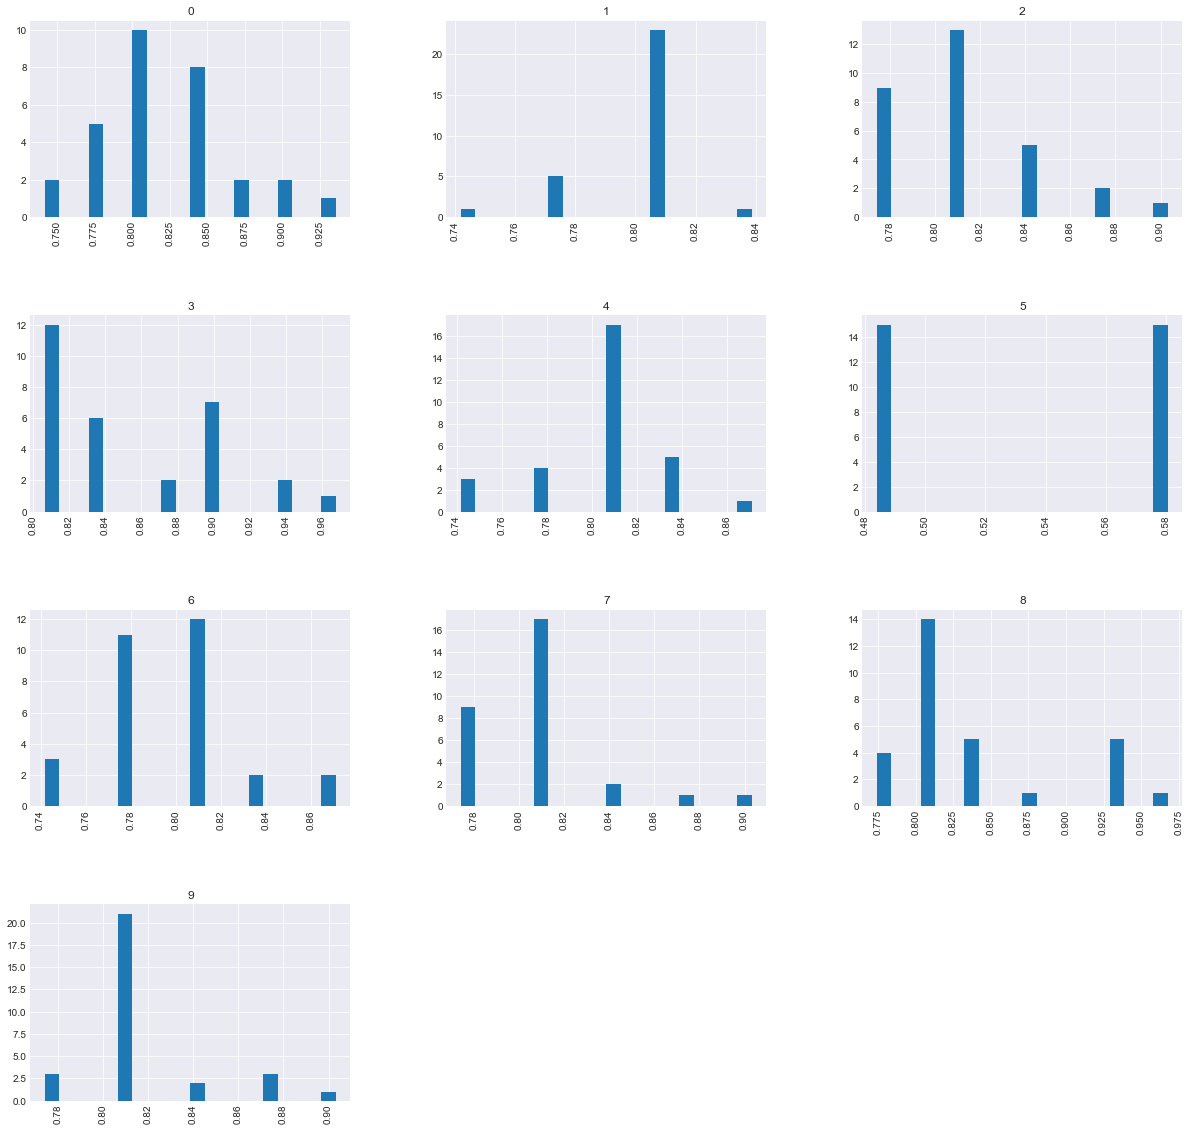

In [10]:
df["validation_accuracy"].hist(by=df["panel_index"], figsize=(20, 20), bins=20)

Let's take a closer look at set 5.  This appears to be the only set where the validation accuracy is the same for each processor without regard to the use of a GPU.  The distinctive feature of this set is the use of `SGD` as the optimizer instead of `Adam`.  It would be interesting to see how our results would vary if we ran more epochs to give `SGD` more time to converge.

In [11]:
df[df.panel_index == 5][["validation_accuracy", "processor"]].sort_values(
    "validation_accuracy"
)

,validation_accuracy,processor
295,0.4839,x86_64
15,0.4839,x86_64
275,0.4839,x86_64
265,0.4839,x86_64
255,0.4839,x86_64
245,0.4839,x86_64
235,0.4839,x86_64
225,0.4839,x86_64
215,0.4839,x86_64
205,0.4839,x86_64


**Validation Accuracy Mean by Hyperparameter Set**

The next table shows the mean of the validation accuracy scores by parameter set, in descending order.  By this measure, once again, in this trial, parameter set 3 is at the top of the list followed by set 8.

In [12]:
parameter_summary = (
    df.groupby(
        [
            "panel_index",
            "kernel_size",
            "strides",
            "pool_size",
            "learning_rate",
            "optimizer",
            "brightness",
            "contrast_factor",
            "flip_on_train",
        ]
    )
    .agg(
        train_mean=("train_accuracy", "mean"),
        validation_mean=("validation_accuracy", "mean"),
    )
    .reset_index()
    .sort_values("validation_mean", ascending=False)
)
parameter_summary

,panel_index,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,train_mean,validation_mean
3,3,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,0.896147,0.853777
8,8,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,0.895270,0.836583
0,0,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.908073,0.820443
9,9,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,0.887893,0.815090
2,2,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,0.891577,0.809700
7,7,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,0.898073,0.804330
4,4,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,0.828067,0.803250
1,1,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.972263,0.800037
6,6,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,0.919473,0.794643
5,5,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,0.632987,0.532250


**Confidence Intervals**

Let's add confidence interval data.

We start by extracting the training and validation accuracy results for each set of hyperparameters.

In [13]:
train_accuracy_results = [
    df[df.panel_index == index].train_accuracy for index in df.panel_index.unique()
]

validation_accuracy_results = [
    df[df.panel_index == index].validation_accuracy for index in df.panel_index.unique()
]

Let's calculate these numbers two ways, first with the t distribution, and then, since we have 30 data points for each set, let's take advantage of the central limit theorem approach.  As the tables below demonstrate, the results are substantially identical.

In [14]:
train_accuracy_ci_t = pd.DataFrame(
    [
        st.t.interval(
            alpha=0.95, df=len(data) - 1, loc=np.mean(data), scale=st.sem(data)
        )
        for data in train_accuracy_results
    ],
    columns=["train_lower_bound (t)", "train_upper_bound (t)"],
)

train_accuracy_ci_norm = pd.DataFrame(
    [
        st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        for data in train_accuracy_results
    ],
    columns=["train_lower_bound (clt)", "train_upper_bound (clt)"],
)

train_accuracy_ci_t.join(train_accuracy_ci_norm).round(3)

,train_lower_bound (t),train_upper_bound (t),train_lower_bound (clt),train_upper_bound (clt)
0,0.898,0.919,0.898,0.918
1,0.967,0.977,0.967,0.977
2,0.880,0.903,0.881,0.902
3,0.888,0.904,0.888,0.904
4,0.817,0.839,0.817,0.839
5,0.617,0.649,0.618,0.648
6,0.911,0.928,0.912,0.927
7,0.888,0.908,0.889,0.908
8,0.881,0.910,0.881,0.909
9,0.879,0.897,0.879,0.897


In [15]:
val_accuracy_ci_t = pd.DataFrame(
    [
        st.t.interval(
            alpha=0.95, df=len(data) - 1, loc=np.mean(data), scale=st.sem(data)
        )
        for data in validation_accuracy_results
    ],
    columns=["validation_lower_bound (t)", "validation_upper_bound (t)"],
)

val_accuracy_ci_norm = pd.DataFrame(
    [
        st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        for data in validation_accuracy_results
    ],
    columns=["train_lower_bound (clt)", "train_upper_bound (clt)"],
)

val_accuracy_ci_t.join(val_accuracy_ci_norm).round(3)

,validation_lower_bound (t),validation_upper_bound (t),train_lower_bound (clt),train_upper_bound (clt)
0,0.804,0.837,0.804,0.837
1,0.793,0.807,0.794,0.806
2,0.797,0.822,0.798,0.822
3,0.835,0.872,0.836,0.872
4,0.792,0.814,0.793,0.814
5,0.514,0.551,0.515,0.550
6,0.783,0.807,0.783,0.806
7,0.793,0.815,0.794,0.815
8,0.815,0.858,0.816,0.857
9,0.804,0.826,0.805,0.826


Instead of using upper and lower bounds for the confidence internal, let's just derive the margin of error using the bounds we already have. 

In [16]:
moe = pd.concat(
    [
        (train_accuracy_ci_norm.iloc[:, 1] - train_accuracy_ci_norm.iloc[:, 0]) / 2,
        (val_accuracy_ci_norm.iloc[:, 1] - val_accuracy_ci_norm.iloc[:, 0]) / 2,
    ],
    axis=1,
    keys=["train_mean_MOE", "validation_mean_MOE"],
)
moe

,train_mean_MOE,validation_mean_MOE
0,0.010072,0.016234
1,0.005012,0.006364
2,0.010842,0.011875
3,0.007804,0.017856
4,0.010672,0.010657
5,0.014904,0.017597
6,0.007715,0.011542
7,0.009558,0.010471
8,0.014079,0.020541
9,0.008728,0.010469


In [17]:
parameter_summary = parameter_summary.join(moe)

In [18]:
parameter_summary

,panel_index,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,train_mean,validation_mean,train_mean_MOE,validation_mean_MOE
3,3,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,0.896147,0.853777,0.007804,0.017856
8,8,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,0.895270,0.836583,0.014079,0.020541
0,0,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.908073,0.820443,0.010072,0.016234
9,9,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,0.887893,0.815090,0.008728,0.010469
2,2,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,0.891577,0.809700,0.010842,0.011875
7,7,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,0.898073,0.804330,0.009558,0.010471
4,4,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,0.828067,0.803250,0.010672,0.010657
1,1,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.972263,0.800037,0.005012,0.006364
6,6,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,0.919473,0.794643,0.007715,0.011542
5,5,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,0.632987,0.532250,0.014904,0.017597


In [19]:
parameter_summary = parameter_summary.reindex(
    columns=[
        "panel_index",
        "train_mean",
        "train_mean_MOE",
        "validation_mean",
        "validation_mean_MOE",
        "kernel_size",
        "strides",
        "pool_size",
        "learning_rate",
        "optimizer",
        "brightness",
        "contrast_factor",
        "flip_on_train",
    ]
)

In [20]:
parameter_summary.round(4)

,panel_index,train_mean,train_mean_MOE,validation_mean,validation_mean_MOE,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train
3,3,0.8961,0.0078,0.8538,0.0179,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random
8,8,0.8953,0.0141,0.8366,0.0205,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes
0,0,0.9081,0.0101,0.8204,0.0162,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random
9,9,0.8879,0.0087,0.8151,0.0105,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no
2,2,0.8916,0.0108,0.8097,0.0119,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random
7,7,0.8981,0.0096,0.8043,0.0105,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random
4,4,0.8281,0.0107,0.8032,0.0107,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random
1,1,0.9723,0.0050,0.8000,0.0064,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random
6,6,0.9195,0.0077,0.7946,0.0115,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random
5,5,0.6330,0.0149,0.5322,0.0176,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random


Text(0.5, 1.0, 'validation accuracy summary')

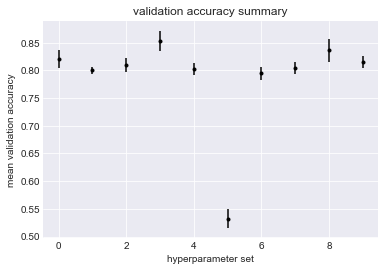

In [21]:
x = parameter_summary.panel_index
y = parameter_summary.validation_mean
dy = parameter_summary.validation_mean_MOE

plt.errorbar(x, y, yerr=dy, fmt=".k")
plt.xlabel("hyperparameter set")
plt.ylabel("mean validation accuracy")
plt.title("validation accuracy summary")

Lets eliminate index 5 from the visualization

In [22]:
x = x[:-1]
y = y[:-1]
dy = dy[:-1]

**Validation Accuracy Mean Values with Confidence Interval Markings**
(for all sets of parameters other than set 5)

Text(0.5, 1.0, 'validation accuracy summary')

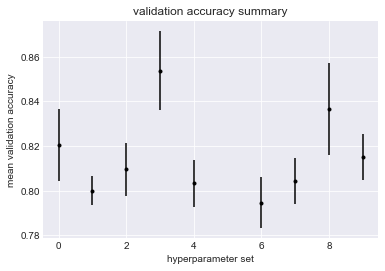

In [23]:
plt.errorbar(x, y, yerr=dy, fmt=".k")
plt.xlabel("hyperparameter set")
plt.ylabel("mean validation accuracy")
plt.title("validation accuracy summary")

**Compare Validation Accuracy Distributions Using Welch's T Test**

We can run Welch's T Test and see where we fail to reject the null hypothesis that the two distributions have equal means.

In [24]:
welch_test_results = [
    (
        x1,
        x2,
        st.ttest_ind(
            validation_accuracy_results[x1],
            validation_accuracy_results[x2],
            equal_var=False,
        )[1],
    )
    for x1, x2 in itertools.combinations(range(10), 2)
]

Lets look for results where the p value is greater then or equal to .05

In [25]:
[(x1, x2, p) for x1, x2, p in welch_test_results if p >= 0.05]

[(0, 2, 0.29990367200717705),
 (0, 4, 0.08884219964668053),
 (0, 7, 0.1084289017680533),
 (0, 8, 0.232119183609304),
 (0, 9, 0.5894520605944227),
 (1, 2, 0.16676118455539354),
 (1, 4, 0.6142349626200825),
 (1, 6, 0.4267610367086586),
 (1, 7, 0.4955792523917406),
 (2, 4, 0.43145292182298556),
 (2, 6, 0.07998941449352721),
 (2, 7, 0.5088747340736268),
 (2, 9, 0.5072607444093258),
 (3, 8, 0.22075689645856436),
 (4, 6, 0.28739436847131966),
 (4, 7, 0.8878239692269371),
 (4, 9, 0.12576700377614308),
 (6, 7, 0.22811394540862723),
 (7, 9, 0.15972724305828642),
 (8, 9, 0.07459620640938124)]

**Key Observation**

The Welch's T Test results indicate that the differences in the distributions for our two best performing sets of parameters are **not** statistically significant. So it appears that on the basis of this data, we could select either of parameter set `3` or `8`.

**Test Data Results**

We have been accumulating test accuracy for every model with every experiment but we have not looked at that data.

In [26]:
round(df[df.panel_index == 3].test_accuracy.mean(), 4)

0.7889

In [27]:
round(df[df.panel_index == 8].test_accuracy.mean(), 4)

0.8091

Confidence Intervals

In [28]:
test_accuracy_results = [
    df[df.panel_index == index].test_accuracy for index in df.panel_index.unique()
]

test_accuracy_ci = pd.DataFrame(
    [
        st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        for data in test_accuracy_results
    ],
    columns=["test_lower_bound", "test_upper_bound"],
)

test_accuracy_mean = df.groupby("panel_index").test_accuracy.mean()

test_df = pd.DataFrame(test_accuracy_mean).join(test_accuracy_ci).reset_index()

test_df['MOE'] = (test_df.test_upper_bound - test_df.test_lower_bound) / 2

test_df.drop(labels=['test_upper_bound', 'test_lower_bound'], axis=1, inplace=True)

In [29]:
test_df.round(4)

,panel_index,test_accuracy,MOE
0,0,0.7960,0.0173
1,1,0.7758,0.0138
2,2,0.7637,0.0146
3,3,0.7889,0.0092
4,4,0.8212,0.0138
5,5,0.3848,0.0410
6,6,0.8273,0.0128
7,7,0.8020,0.0160
8,8,0.8091,0.0166
9,9,0.8041,0.0120


Text(0.5, 1.0, 'test accuracy summary')

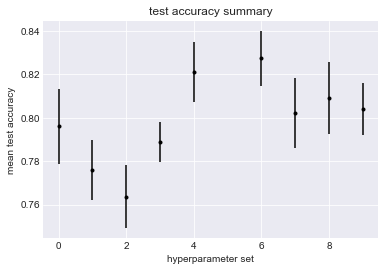

In [30]:
test_df=test_df.sort_values(['test_accuracy'], ascending=False)
plt.errorbar(test_df.panel_index[:-1], test_df.test_accuracy[:-1], yerr=test_df.MOE[:-1], fmt=".k")
plt.xlabel("hyperparameter set")
plt.ylabel("mean test accuracy")
plt.title("test accuracy summary")

Welch's T Test

In [31]:
welch_test_results = [
    (
        x1,
        x2,
        st.ttest_ind(
            test_accuracy_results[x1],
            test_accuracy_results[x2],
            equal_var=False,
        )[1],
    )
    for x1, x2 in itertools.combinations(range(10), 2)
]

In [32]:
[(x1, x2, p) for x1, x2, p in welch_test_results if p >= 0.05]

[(0, 1, 0.07939585879972079),
 (0, 3, 0.483438215347068),
 (0, 7, 0.6166099083841343),
 (0, 8, 0.28818031819019535),
 (0, 9, 0.455327113861127),
 (1, 2, 0.24289929999937684),
 (1, 3, 0.12784347612417374),
 (3, 7, 0.17088023447130138),
 (3, 9, 0.05474439809528682),
 (4, 6, 0.5295881672516116),
 (4, 7, 0.08047193049663731),
 (4, 8, 0.2759510617401978),
 (4, 9, 0.07040216052214106),
 (6, 8, 0.09518002233297271),
 (7, 8, 0.5511368374379628),
 (7, 9, 0.844029688085819),
 (8, 9, 0.6313837755331597)]